          Date  Daily Profit  3-day Avg Profit
0   2023-08-21        856.68               NaN
1   2023-08-21        146.71               NaN
2   2023-08-21        297.45        433.613333
3   2023-08-21         87.64        177.266667
4   2023-08-21         42.01        142.366667
..         ...           ...               ...
65  2023-08-27        407.34        552.863333
66  2023-08-27         84.00        552.070000
67  2023-08-27        947.84        479.726667
68  2023-08-27        126.44        386.093333
69  2023-08-27         25.88        366.720000

[70 rows x 3 columns]


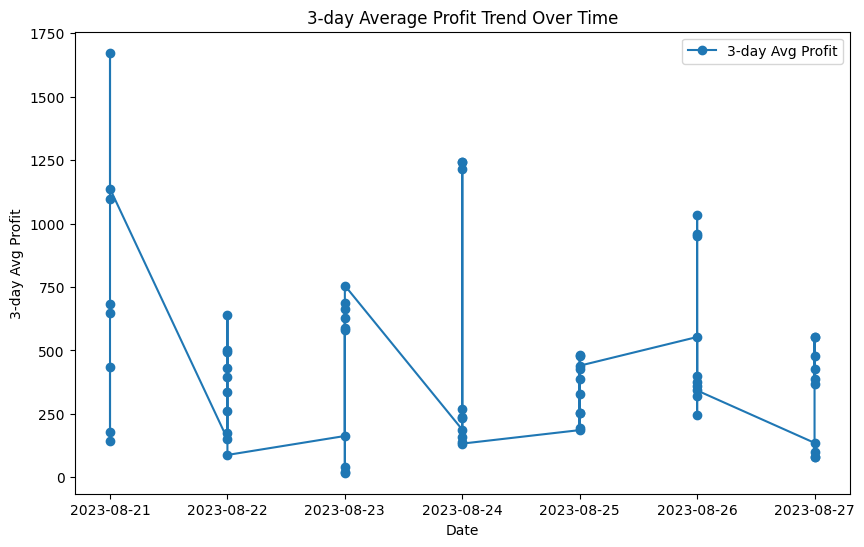


 6 -- 3-Day Average Gross Profit:
         Date  3-Day Avg Gross Profit
0  2023-08-21               91.580000
1  2023-08-21               87.645000
2  2023-08-21               93.016667
3  2023-08-21               84.000000
4  2023-08-21              103.070000
..        ...                     ...
64 2023-08-27              100.330000
65 2023-08-27               95.940000
66 2023-08-27               99.103333
67 2023-08-27               95.320000
69 2023-08-27               93.556667

[70 rows x 2 columns]

7 -- Daily Average Gross Profit:
Day
2023-08-21    96.401167
2023-08-22    76.118000
2023-08-23    70.726667
2023-08-24    50.176667
2023-08-25    56.646667
2023-08-26    73.618000
2023-08-27    94.158000
Name: 3-Day Avg Gross Profit, dtype: float64

9 -- Percentiles for Buying and Selling Prices:
      Buying price  Selling price
0.25         29.90        38.9750
0.50         60.76        78.9900
0.75         78.32       103.3975
10 -- Frequency of Prices Below 25th Percentile: 1

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("./CSV/sales_data_2.csv")

df['Daily Profit'] = (df['Selling price'] - df['Buying price']) * df['Quantity sold']
df['3-day Avg Profit'] = df['Daily Profit'].rolling(window=3).mean()
print(df[['Date', 'Daily Profit', '3-day Avg Profit']])

plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['3-day Avg Profit'], label='3-day Avg Profit', marker='o')
plt.title('3-day Average Profit Trend Over Time')
plt.xlabel('Date')
plt.ylabel('3-day Avg Profit')
plt.legend()
plt.show()

df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values(by="Date")
df["3-Day Avg Gross Profit"] = df["Selling price"].rolling(window=3, min_periods=1).mean()

df["Day"] = df["Date"].dt.strftime("%Y-%m-%d")
daily_avg_profit = df.groupby("Day")["3-Day Avg Gross Profit"].mean()


percentiles = df[['Buying price', 'Selling price']].quantile([0.25, 0.5, 0.75])


below_25th = df[df['Selling price'] < percentiles.loc[0.25]['Selling price']]
above_75th = df[df['Selling price'] > percentiles.loc[0.75]['Selling price']]

print("\n 6 -- 3-Day Average Gross Profit:")
print(df[["Date", "3-Day Avg Gross Profit"]])

print("\n7 -- Daily Average Gross Profit:")
print(daily_avg_profit)

print("\n9 -- Percentiles for Buying and Selling Prices:")
print(percentiles)

print("10 -- Frequency of Prices Below 25th Percentile:",len(below_25th))
print("10 --Frequency of Prices Above 75th Percentile:",len(above_75th))





df["Profit"] = (df["Selling price"] - df["Buying price"]) * df["Quantity sold"]
current_gross_margin = df["Profit"].sum()

honoring_vendor_4_df = df[df["Firm bought from"] == "Vendor4"]
honoring_vendor_4_gross_margin = honoring_vendor_4_df["Profit"].sum()

impact_on_gross_margin = current_gross_margin - honoring_vendor_4_gross_margin

vendor_avg_margin = df.groupby("Firm bought from")["Profit"].mean()
strategic_vendor = vendor_avg_margin.idxmax()

theoretical_max_margin = vendor_avg_margin.max()



print("11 -- Impact on Gross Margin if Vendor 4 is Honored: {:.2f}".format(impact_on_gross_margin))
print("12 -- Vendor for Strategic Tie-Up: {}".format(strategic_vendor))
print(" Theoretical Maximum Gross Margin from that Branch: {:.2f}".format(theoretical_max_margin))
print("13 -- Price Elasticity of Sapota: To calculate price elasticity, more data is needed.")


